[View in Colaboratory](https://colab.research.google.com/github/praveen460/datascience/blob/master/tensorflow_basic%20nn.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
y_true =  (0.5 * x_data ) + 5 + noise

In [0]:
batch_size=10

In [0]:
m=tf.Variable(-0.2)
b=tf.Variable(3.5)

In [0]:
x_ph=tf.placeholder(tf.float32,[batch_size])
y_ph=tf.placeholder(tf.float32,[batch_size])

In [0]:
y_pred=m*x_ph+b

In [0]:
error=tf.reduce_sum(tf.square(yph-y_pred))

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [0]:
init=tf.global_variables_initializer()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_true,test_size=0.3)

In [60]:
with tf.Session() as sess:
  sess.run(init)
  batches=10000
  for i in range(batches):
    rand_int=np.random.randint(0,len(x_train),batch_size)
    sess.run(train,feed_dict={x_ph:x_train[rand_int],y_ph:y_train[rand_int]})
    m_cal,b_cal=sess.run([m,b])
print(m_cal)
print(b_cal)

0.45676756
5.0107217


In [0]:
df=pd.concat([pd.DataFrame(x_test,columns=['X']),pd.DataFrame(y_test,columns=['Y'])],axis=1)

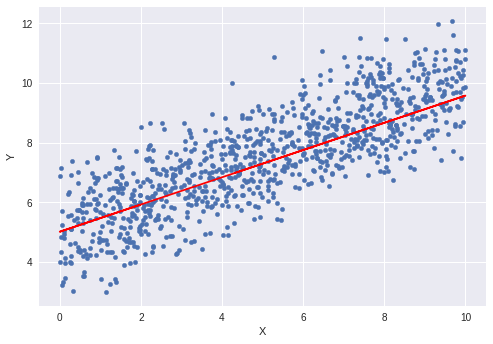

In [72]:
y_pred=x_test*m_cal+b_cal
df.sample(1000).plot(x='X',y='Y',kind='scatter')
plt.plot(x_test,y_pred,'r')